# Data Loading and Initial Analysis

In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Phase 1 : Data Preparation Initialized ")
print("*" *50)

Phase 1 : Data Preparation Initialized 
**************************************************


In [56]:

def create_sample_fraud_dataset(n_samples=10000, fraud_ratio=0.05):
    """
    Create a realistic credit card fraud dataset
    """
    n_fraud = int(n_samples * fraud_ratio)
    n_legit = n_samples - n_fraud
    
    X, y = make_classification(
        n_samples=n_samples,
        n_features=30,
        n_informative=10,
        n_redundant=10,
        n_repeated=0,
        n_clusters_per_class=2,
        weights=[1-fraud_ratio],
        random_state=RANDOM_STATE,
        flip_y=0.01
    )
    
    # Create DataFrame with meaningful feature names
    feature_columns = [f'V{i}' for i in range(1, 29)] + ['Transaction_Amount', 'Time_of_Day']
    
    df = pd.DataFrame(X, columns=feature_columns)
    df['Class'] = y
    
    df['Transaction_Amount'] = np.exp(df['Transaction_Amount'] * 0.5 + 3)  
    df['Time_of_Day'] = (df['Time_of_Day'] * 6 + 12) % 24  
    
    return df

df = create_sample_fraud_dataset(n_samples=10000, fraud_ratio=0.02)
print("Dataset created successfully!")
print(f"Dataset shape: {df.shape}")

Dataset created successfully!
Dataset shape: (10000, 31)


# Data Quality Check 

In [59]:
print("DATA QUALITY CHECK")

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})
print("Missing Values Analysis:")
print(missing_info[missing_info['Missing Count'] > 0])


print("Data Types")
print(df.dtypes)

print("Basic Statistics")
print(df.describe())

constant_features = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant features : {constant_features}")



DATA QUALITY CHECK
Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
Data Types
V1                    float64
V2                    float64
V3                    float64
V4                    float64
V5                    float64
V6                    float64
V7                    float64
V8                    float64
V9                    float64
V10                   float64
V11                   float64
V12                   float64
V13                   float64
V14                   float64
V15                   float64
V16                   float64
V17                   float64
V18                   float64
V19                   float64
V20                   float64
V21                   float64
V22                   float64
V23                   float64
V24                   float64
V25                   float64
V26                   float64
V27                   float64
V28                   float64
Transaction_Amount    float64
Time

# Save Initial Dataset 

In [62]:
import os 

os.makedirs('../data/raw', exist_ok  = True)
os.makedirs('../data/processed', exist_ok = True)

df.to_csv('../data/raw/credit_card_fraud_raw.csv', index = False)
print("Raw dataset saved ")

df_clean = df.copy()
df_clean.to_csv('../data/processed/credit_card_fraud_clean.csv',index = False)
print("Processed datasset saved ")

Raw dataset saved 
Processed datasset saved 


# Baseline model establishment 

=== BASELINE MODEL TRAINING ===
Training set size: (8000, 30)
Test set size: (2000, 30)
Fraud cases in training: 200 (2.50%)
Fraud cases in test: 50 (2.50%)

=== BASELINE MODEL PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1950
           1       1.00      0.14      0.25        50

    accuracy                           0.98      2000
   macro avg       0.99      0.57      0.62      2000
weighted avg       0.98      0.98      0.97      2000



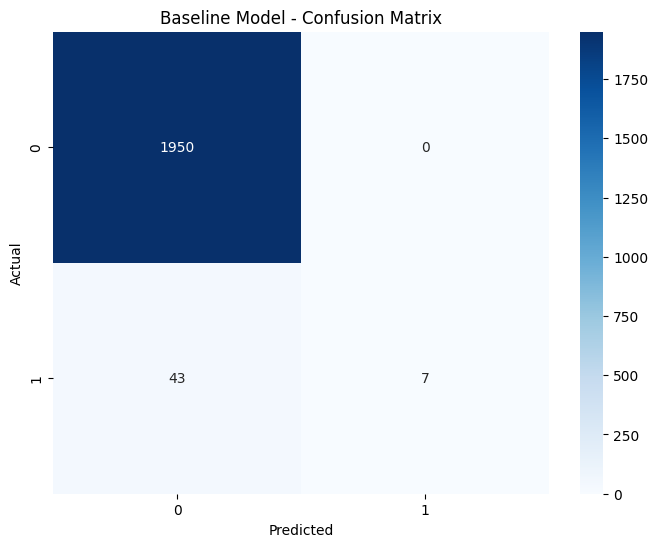

In [65]:
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=RANDOM_STATE
)

print("=== BASELINE MODEL TRAINING ===")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Fraud cases in training: {y_train.sum()} ({y_train.mean()*100:.2f}%)")
print(f"Fraud cases in test: {y_test.sum()} ({y_test.mean()*100:.2f}%)")

# Baseline Random Forest 
baseline_model = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)


print("\n=== BASELINE MODEL PERFORMANCE ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [67]:
# Summary 
print("\n=== PHASE 1 COMPLETION SUMMARY ===")
print("✓ Environment and dependencies setup")
print("✓ Dataset loaded and analyzed")
print(f"✓ Class imbalance: {class_percentage[1]:.2f}% minority class")
print("✓ Data quality checks passed")
print("✓ Baseline model performance established")
print("✓ Ready for detailed EDA in Phase 2")

print("\nKey Findings:")
print(f"- Minority class ratio: {class_percentage[1]:.2f}%")
print(f"- Dataset dimensions: {df.shape}")
print(f"- No missing values detected")
print(f"- Baseline model F1-score: {classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']:.3f}")


=== PHASE 1 COMPLETION SUMMARY ===
✓ Environment and dependencies setup
✓ Dataset loaded and analyzed
✓ Class imbalance: 2.50% minority class
✓ Data quality checks passed
✓ Baseline model performance established
✓ Ready for detailed EDA in Phase 2

Key Findings:
- Minority class ratio: 2.50%
- Dataset dimensions: (10000, 31)
- No missing values detected
- Baseline model F1-score: 0.246
